In [7]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

I imported the Python packages I will need to view the graphs.

In [8]:
df = pd.read_csv("incidents.csv")
df = df.dropna()
df.head(5)

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,265584996,21204292,27,2021-11-09T11:33:00,"10 Block S 18th St & Pius St Pittsburgh, PA 15203",N,South Side Slopes,3,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,1706.0,3.0,3.0,-79.981049,40.425811
1,265586753,21204310,27,2021-11-09T06:00:00,"2800 Block Kenilworth St Pittsburgh, PA 15226",N,Brookline,6,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,1919.0,4.0,5.0,-80.026570,40.396203
4,264606072,21196030,27,2021-10-26T17:00:00,"600 Block William Penn Pl Pittsburgh, PA 15219",N,Central Business District,2,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,201.0,6.0,6.0,-79.996762,40.441141
5,264609956,21195937,10,2021-10-26T14:22:00,"600 Block 1st Ave Pittsburgh, PA 15219",Y,Highland Park,2,HARRASSMENT,2709(a) Harassment. / 3304 Criminal Mischief.,201.0,6.0,6.0,-79.996041,40.435040
6,264611733,21196110,0,2021-10-26T19:12:00,"300 Block Venture St Pittsburgh, PA 15214",N,Perry North,1,99,3926.C1 THEFT OF SERVICES,2607.0,1.0,1.0,-80.013158,40.485188


I loaded the dataset of police incidents reported in the last 30 days. I then showed the first 5 attributes.

In [9]:
df["INCIDENTNEIGHBORHOOD"].value_counts()

Central Business District    181
South Side Flats             170
Carrick                      102
Mount Washington              81
Homewood North                80
                            ... 
Allegheny West                 2
New Homestead                  2
Outside County                 2
Summer Hill                    1
Chartiers City                 1
Name: INCIDENTNEIGHBORHOOD, Length: 89, dtype: int64

I ordered the neighborhoods by how many incidents they have had from greatest to least.

In [10]:
safe_neighborhoods = pd.DataFrame((df["INCIDENTNEIGHBORHOOD"].value_counts()).tail(10))
safe_neighborhoods

,INCIDENTNEIGHBORHOOD
Mount Oliver,4
Duquesne Heights,4
Windgap,3
East Carnegie,3
St. Clair,2
Allegheny West,2
New Homestead,2
Outside County,2
Summer Hill,1
Chartiers City,1


I showed the 10 neighborhoods with the least incidents. These are the 10 safest neighborhoods.

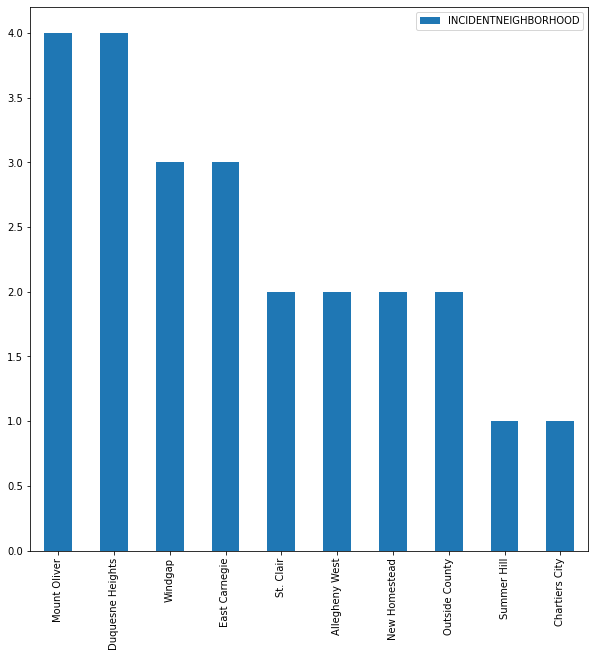

In [11]:
safe_neighborhoods.plot.bar(figsize = (10,10))

I plotted the 10 safest neighborhoods to show that there is not much difference between them as they are all relatively safe.

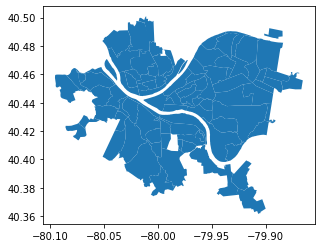

In [12]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

I loaded the map of Pittsburgh.

In [13]:
value = df["INCIDENTNEIGHBORHOOD"].value_counts()
value = pd.DataFrame(value)
value

,INCIDENTNEIGHBORHOOD
Central Business District,181
South Side Flats,170
Carrick,102
Mount Washington,81
Homewood North,80
...,...
Allegheny West,2
New Homestead,2
Outside County,2
Summer Hill,1


I put all of the neighborhoods in a data frame.

In [14]:
incidents_map = neighborhoods.merge(value, how='left', left_on='hood', right_on=value.index)
# look at the head to confirm it merged correctly
incidents_map[['hood','INCIDENTNEIGHBORHOOD','geometry']].head()

,hood,INCIDENTNEIGHBORHOOD,geometry
0,Central Oakland,25.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,31.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,12.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,30.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,30.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


I start syncing the data up with the map of Pittsburgh.

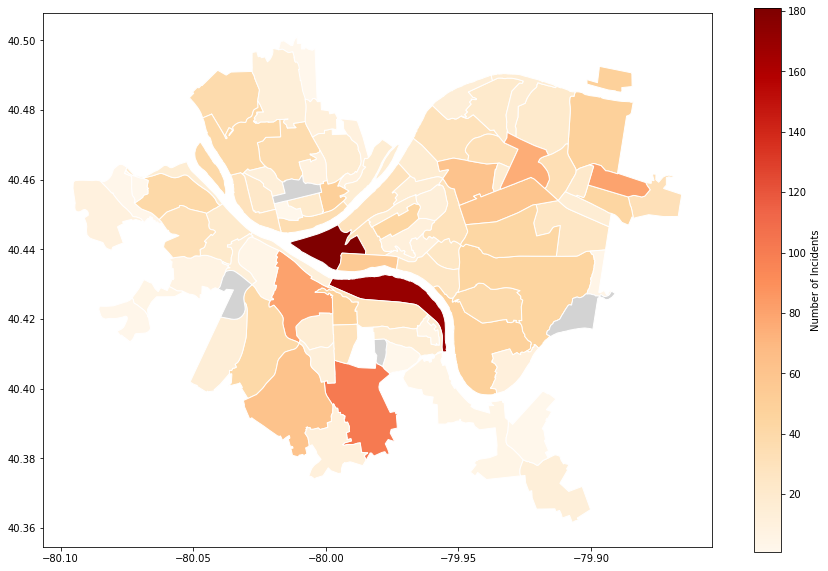

In [15]:
incidents_map.plot(column='INCIDENTNEIGHBORHOOD', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Incidents"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

I color code the map of Pittsburgh so the darker areas have more incidents. As you can see, there are many neighborhoods that have little to no incidents. Pairing this data with the data of my partners, I came to the conclusion that Mount Oliver is the safest since it is the best for their data sets and it is in the top 10 for mine.